# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [19]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree



boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [10]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [11]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [6]:
# 1. Tratar Dados Ausentes
boston = boston.dropna()

In [ ]:
# 2. Codificar Variáveis Categóricas
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' para evitar multicolinearidade
df_encoded = pd.DataFrame(encoder.fit_transform(df[['posse_imovel', 'posse_veiculo']]))
df_encoded.columns = encoder.get_feature_names_out(['posse_imovel', 'posse_veiculo'])
df = pd.concat([df, df_encoded], axis=1)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

### 3. Separe os dados em validação e teste

In [7]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
# Treinando uma árvore com profundidade máxima = 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8)
tree_depth_8.fit(X_train, y_train)

# Fazendo previsões
y_pred_depth_8 = tree_depth_8.predict(X_test)

# Avaliando o desempenho da árvore com profundidade máxima = 8
mse_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
print(f'Mean Squared Error (depth=8): {mse_depth_8}')

Mean Squared Error (depth=8): 8.621180180651216


In [13]:
# Treinando uma árvore com profundidade máxima = 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2)
tree_depth_2.fit(X_train, y_train)

# Fazendo previsões
y_pred_depth_2 = tree_depth_2.predict(X_test)

# Avaliando o desempenho da árvore com profundidade máxima = 2
mse_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
print(f'Mean Squared Error (depth=2): {mse_depth_2}')

Mean Squared Error (depth=2): 25.9931908959712


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [14]:
# Calculando o MSE para a árvore com profundidade máxima = 8 (base de treinamento)
y_train_pred_depth_8 = tree_depth_8.predict(X_train)
mse_train_depth_8 = mean_squared_error(y_train, y_train_pred_depth_8)
print(f'Mean Squared Error (depth=8, train): {mse_train_depth_8}')

# Calculando o MSE para a árvore com profundidade máxima = 8 (base de testes)
mse_test_depth_8 = mean_squared_error(y_test, y_pred_depth_8)
print(f'Mean Squared Error (depth=8, test): {mse_test_depth_8}')

Mean Squared Error (depth=8, train): 1.9490192185625448
Mean Squared Error (depth=8, test): 8.621180180651216


In [15]:
# Calculando o MSE para a árvore com profundidade máxima = 2 (base de treinamento)
y_train_pred_depth_2 = tree_depth_2.predict(X_train)
mse_train_depth_2 = mean_squared_error(y_train, y_train_pred_depth_2)
print(f'Mean Squared Error (depth=2, train): {mse_train_depth_2}')

# Calculando o MSE para a árvore com profundidade máxima = 2 (base de testes)
mse_test_depth_2 = mean_squared_error(y_test, y_pred_depth_2)
print(f'Mean Squared Error (depth=2, test): {mse_test_depth_2}')

Mean Squared Error (depth=2, train): 25.654637281631615
Mean Squared Error (depth=2, test): 25.9931908959712


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [ ]:
Arbore com uma profundidade maxima de 8

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

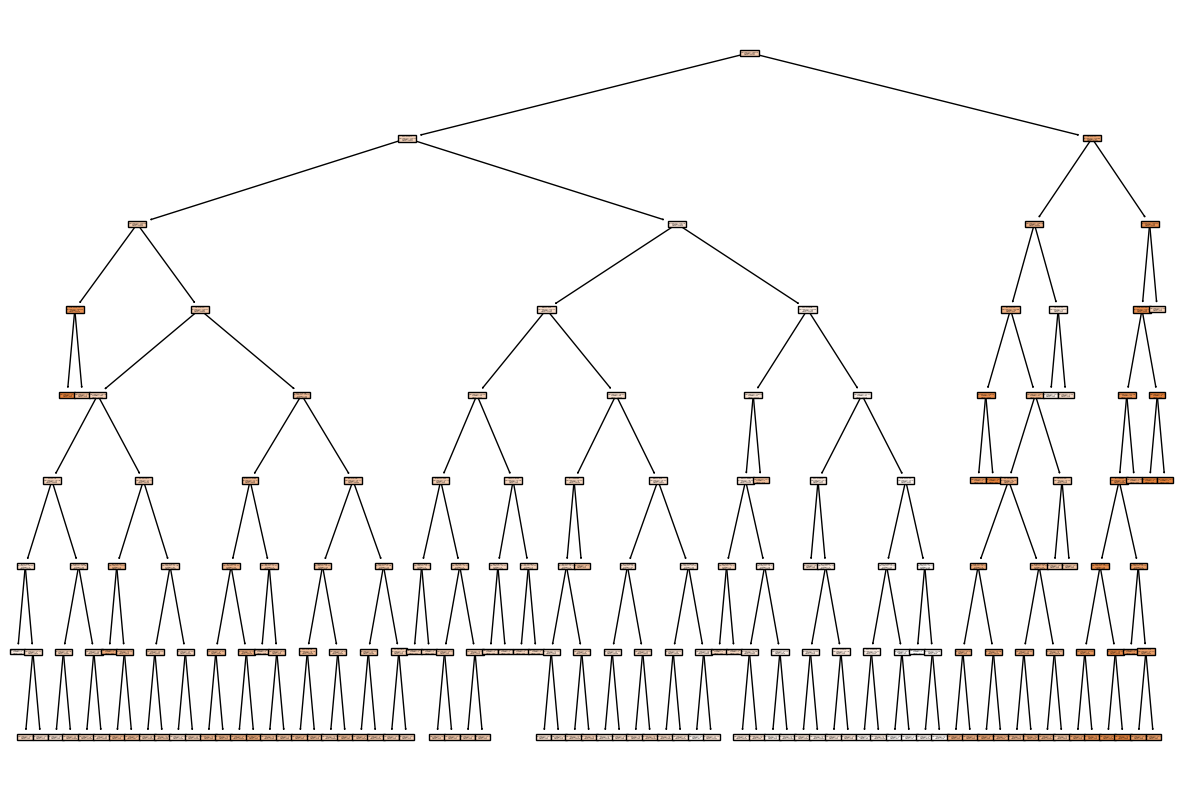

In [22]:
# Visualizando a árvore com profundidade máxima = 8
plt.figure(figsize=(15, 10))
plot_tree(tree_depth_8, filled=True, feature_names=list(boston.columns[:-1]), class_names=['0', '1'])
plt.show()